<a href="https://colab.research.google.com/github/Ricardo0621/music-genre-and-emotion-classification/blob/master/NMA2021_TheTrogonQuartet_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NMA 2021: The Trogon Quartet**


Imports

In [116]:
import os
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

Creating folders and downloading the audio dataset

In [119]:
audio_root = 'genres_original'
images_root = 'images_original'
audio_path = image_path = ''
# genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
genres = ['blues', 'classical']
audio_extension = '.wav'
image_extension = '.png'

#Checking wheter directory exists or no
if not os.path.exists(audio_root):
  os.mkdir(audio_root)
if not os.path.exists(images_root):
  os.mkdir(images_root)
#Appending genres to audio and images directory
for genre in genres:
  audio_path = os.path.join(audio_root, genre)
  image_path = os.path.join(images_root, genre)
  #Creating genres subdirectory (folders) if they don't exist
  if not os.path.exists(image_path):
    os.mkdir(image_path)
  if not os.path.exists(audio_path):
    os.mkdir(audio_path)
    #Creating audio files
    for i in range(100):
      if i <= 9:
        urllib.request.urlretrieve('http://www.marsyas.info/sound/genres/' + genre + '/' + genre + '.0000' + str(i) + audio_extension, os.path.join(audio_path , genre + '.0000' + str(i) + audio_extension))
      else:
        urllib.request.urlretrieve('http://www.marsyas.info/sound/genres/' + genre + '/' + genre + '.000' + str(i) + audio_extension, os.path.join(audio_path , genre + '.000' + str(i) + audio_extension))

number_of_folders = os.listdir(audio_fpath)
audio_clips = os.listdir(audio_path)
print("Sucessfuly created {} folders/genres with {} .wav files each!". format(len(number_of_folders), len(audio_clips)))

Sucessfuly created 2 folders/genres with 100 .wav files each!


<class 'numpy.ndarray'> <class 'int'>
(1323588,) 44100


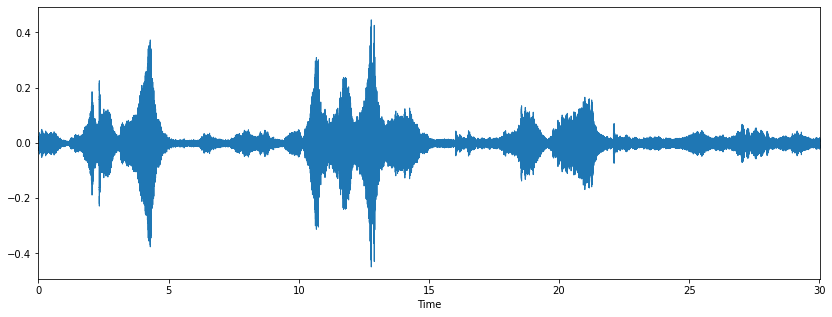

In [120]:
audio_clip = 'classical.00041'
fname = audio_path + '/'+ audio_clip + audio_extension
x, sr = librosa.load(fname, sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

#Wasveplot
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

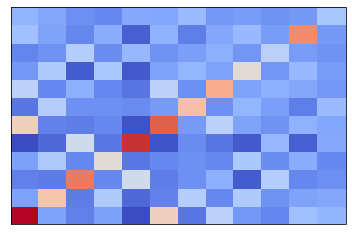

In [121]:
# X = librosa.stft(x)
# Xdb = librosa.amplitude_to_db(abs(X))
# plt.figure(figsize=(14, 5)) #Size of the image
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
# plt.colorbar()
# plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
# plt.colorbar()
y, sr = librosa.load(fname, sr=44100)
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
ccov = np.cov(chroma)
plt, ax = plt.subplots(sharey=True,sharex=True)
img = librosa.display.specshow(ccov, y_axis='chroma', x_axis='time',
                               key='Eb:maj', ax=ax)
img2 = librosa.display.specshow(ccov)
# ax.set(title='Chroma covariance')
# plt.colorbar(img2)
plt.savefig(image_path + '/' + audio_clip + image_extension)

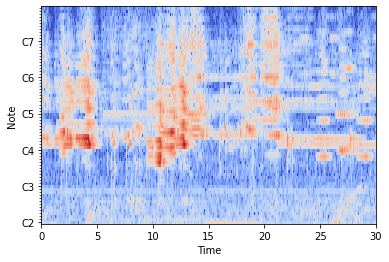

In [97]:
x, sr = librosa.load(fname)
ipd.Audio(x, rate=sr)
fmin = librosa.midi_to_hz(36)
hop_length = 512
C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)


logC = librosa.amplitude_to_db(np.abs(C))
#plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')

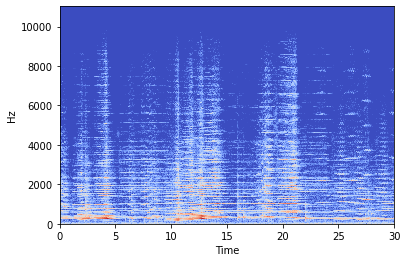

In [98]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
#plt.figure(figsize=(14, 5)) #Size of the image
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
#plt.colorbar()

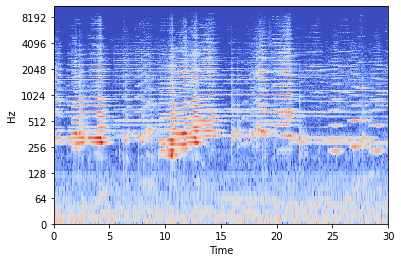

In [99]:
# plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.savefig('test2.png')

#plt.colorbar()